In [9]:
%matplotlib inline

import pandas as pd
import numpy as np

import Constants as C
from PlotTool import PlotTool
from Loader import Loader
from Cuts import qlayerCut

import matplotlib.pyplot as plt

savedir = '../plots/mvaana/'

In [2]:
# Define some selection
basesel = '(NPE>1000&&hs_q_tot_pulses>1000&&hm_nhit_doms>50&&!passHESE)'

# Load the data here
loader = Loader(basesel)

dt_data = loader.getData()
dt_cor  = loader.getCorsika()
dt_nue  = loader.getNuE()
dt_numu = loader.getNuMu()

In [3]:
# Now that the data is loaded, put everything into an info object
dt_mc = pd.concat([dt_cor, dt_nue, dt_numu])

def getinfo(data, mctot, cor, nue, numu):

    return {'data' : [data, mctot, cor, nue, numu, nue, numu],
            'names'    : ['Data',
                          'Total Bkg.', 
                          r'Atmos. $\mu$',
                          r'Atmos. $\nu_{e}$', 
                          r'Atmos. $\nu_{\mu}$',
                          r'Astro. $\nu_{e}$',
                          r'Astro. $\nu_{\mu}$'],
            'weights' : ['w','w','w','w','w', 'wE2', 'wE2'], 
            'colors'  : ['black', 'r', 'm', 'g', 'b', 'y','c'],
            'lw'      : [0, 1.5, 1.5, 1.5, 1.5,1.5,1.5],
            'ls'      : ['solid','dashed','solid','solid','solid','solid','solid'],
            'marker'  : ['.',' ', ' ', ' ', ' ',' ',' ']
    }
    
info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)

In [4]:
# Initialize the plot tool
p_tool = PlotTool()

# Now drop in some stacked plots that we want to understand
variables = {'hs_z_travel' : [25,-500,500, 'ztravel','z-travel [m]'],
             'rho_travel'  : [25, 0, 1000, 'rhotravel', r'$\rho$-travel [m]'],
             'log10(hs_q_tot_pulses)' : [40, 3, 7, 'logqtot','log10(NPE)'],
             'log10(NPE)'     : [40, 3, 7, 'lognpe','log10(NPE) (portia)'],
             #'cos(ImpLF_zen)' : [30, -1, 1, 'coszen', r'cos($\theta$)'],
             'hm_nhit_doms'   : [50,0,1500, 'hitdoms', r'N Hit Doms'],
             'Nch'            : [20,0,1500, 'Nch', 'N Channel (portia)'],
             'hm_nhit_strings' : [86,0,86, 'Nstr', 'N Hit Strings'],
             #'q_largest-q_onstring' : [50, -5000, 2000, 'qlargeMqstr'],
             #'t_largest-t_onstring' : [50, -10000, 10000, 'tlargeMtstr'],
             #'tlarge-tearly' : [50, 0, 20000, 'tearlyMtlargest', 'tlarge - tearly'],
             'tlarge5[0]-tearly5[0]' : [50, 0, 20000, 'tearlyMtlargest', 'tlarge - tearly'],
             '(q_out0+q_out1)/(q_out0+q_out1+q_out2+q_in)' : [50,0,1,'qratio','qratio'],
             'widthlarge5[0]' : [25,0,500,'widthlarge0','Waveform Width of Largest Charge Dom'],
             'widthlarge5[1]' : [25,0,500,'widthlarge1', 'Waveform Width of 2nd Largest Charge Dom'],
             'risetimelarge5[0]' : [25,0,500,'risetimelarge0', 'Waveform Risetime of Largest Charge Dom'],
             'risetimelarge5[1]': [25,0,500,'risetimelarge1', 'Waveform Risetime of 2nd Largest Charge Dom']
             }



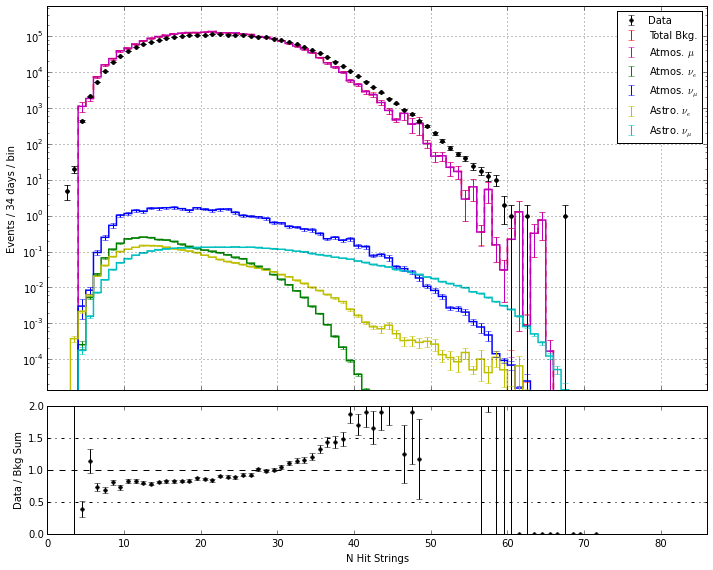

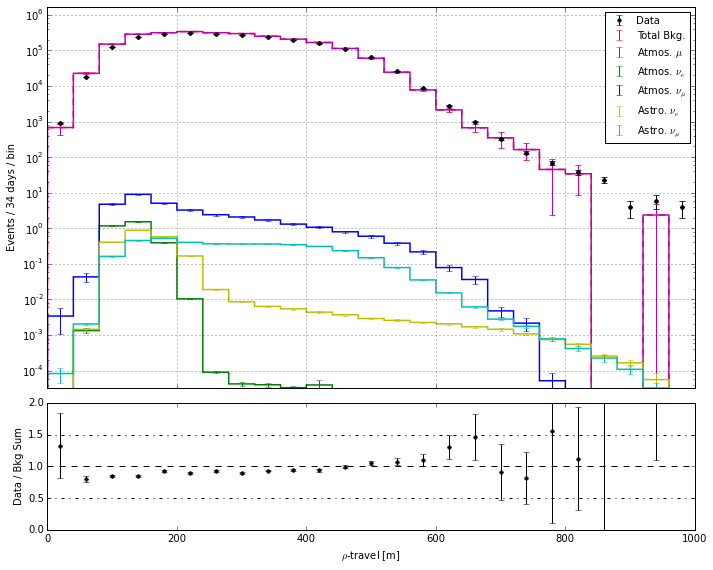

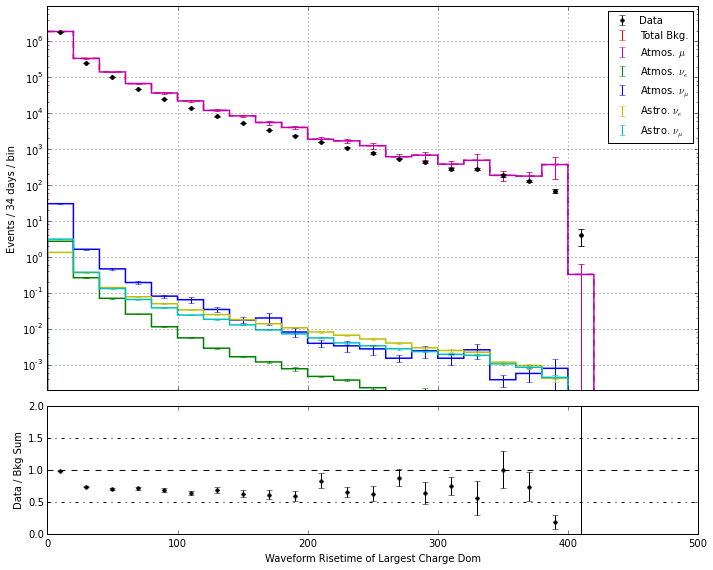

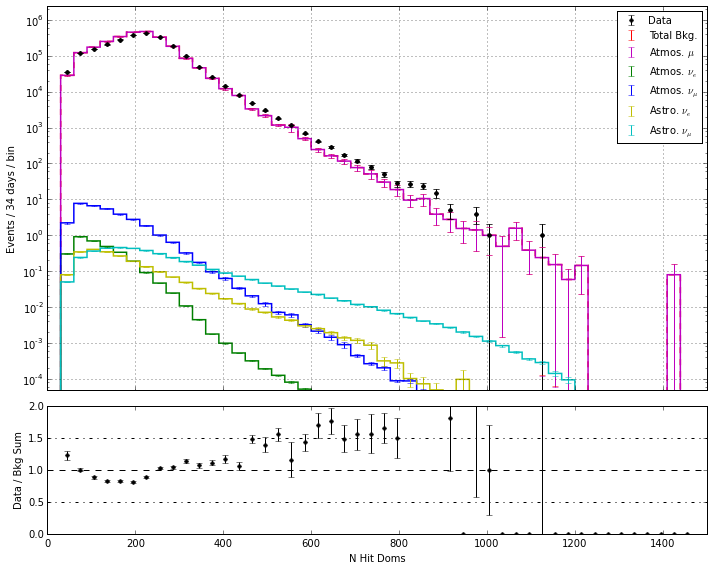

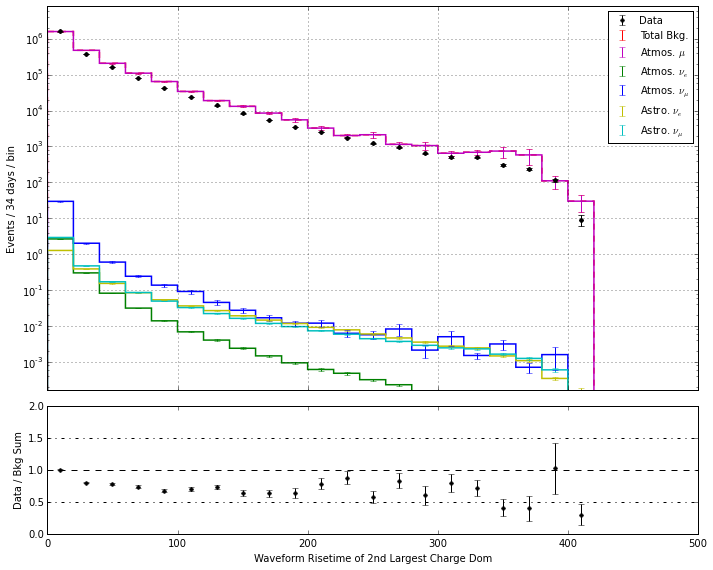

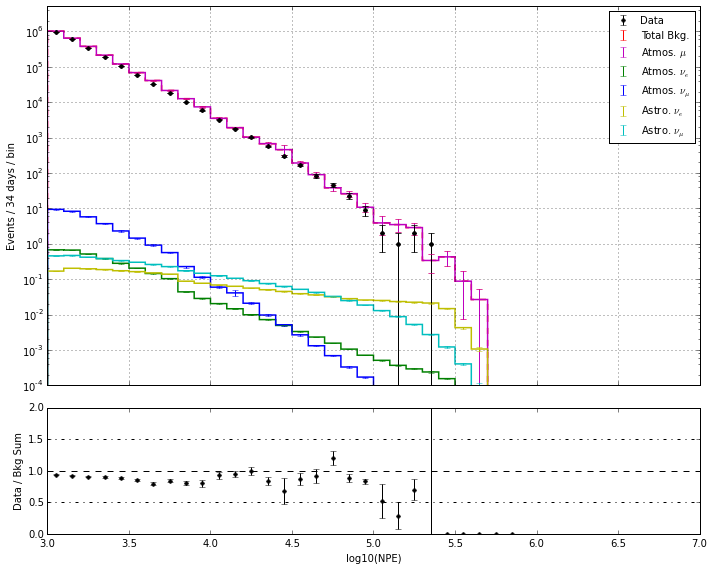

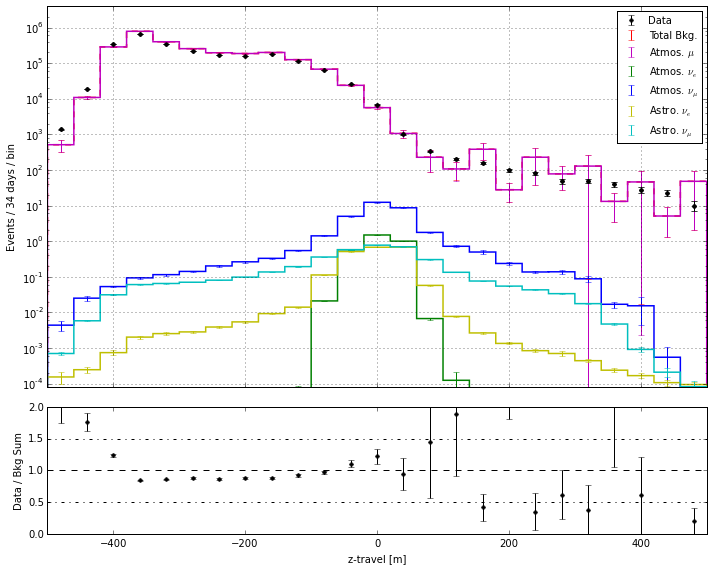

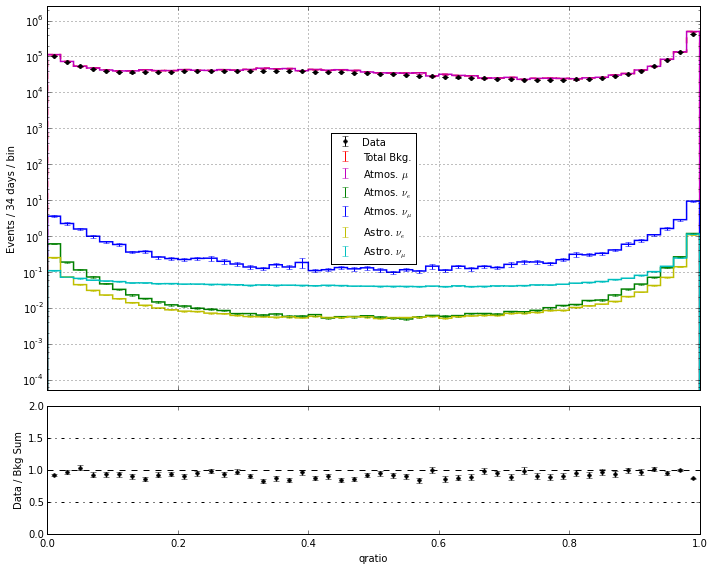

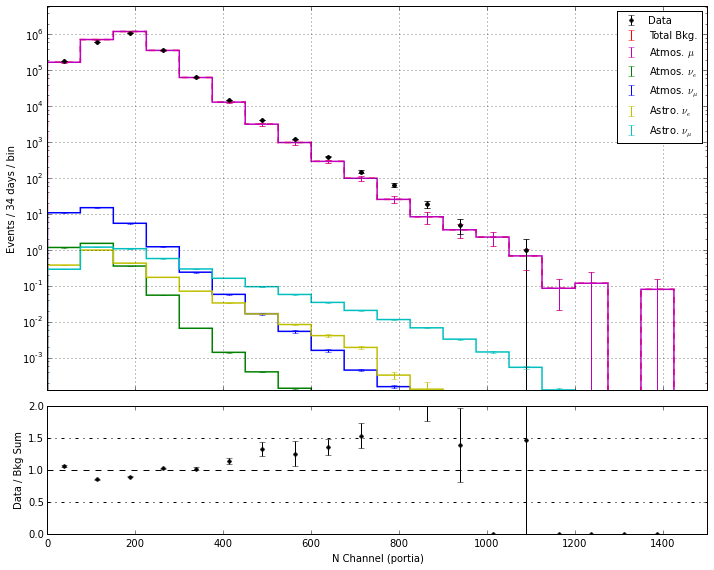

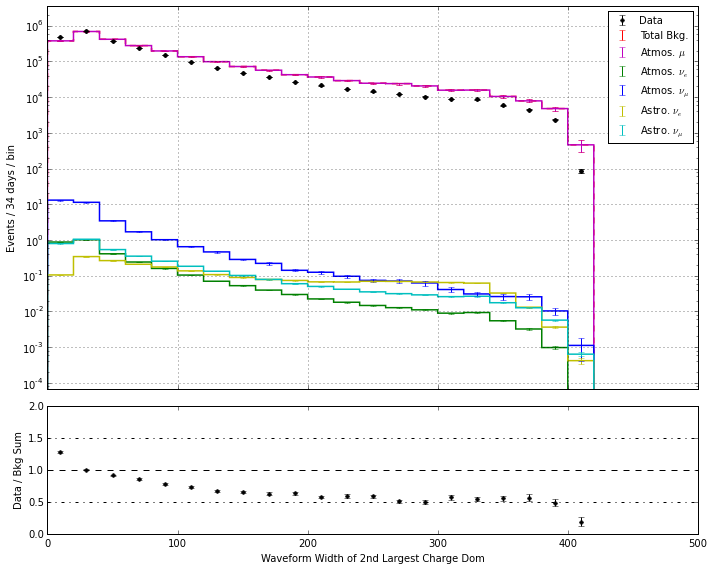

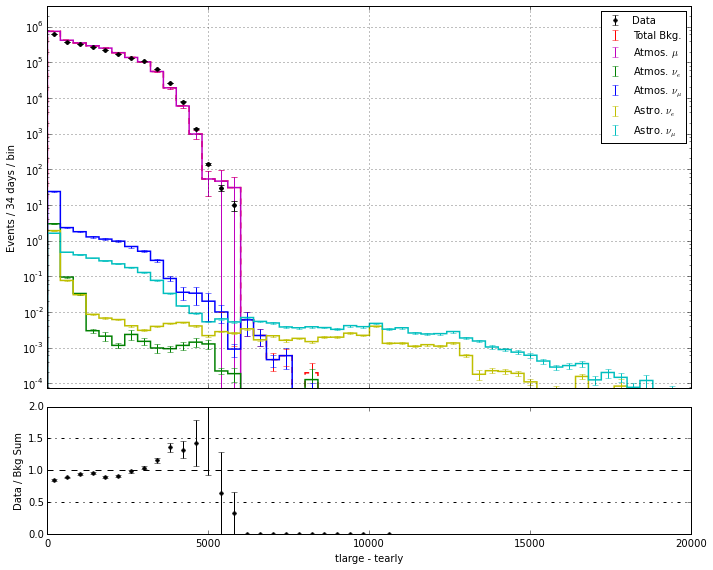

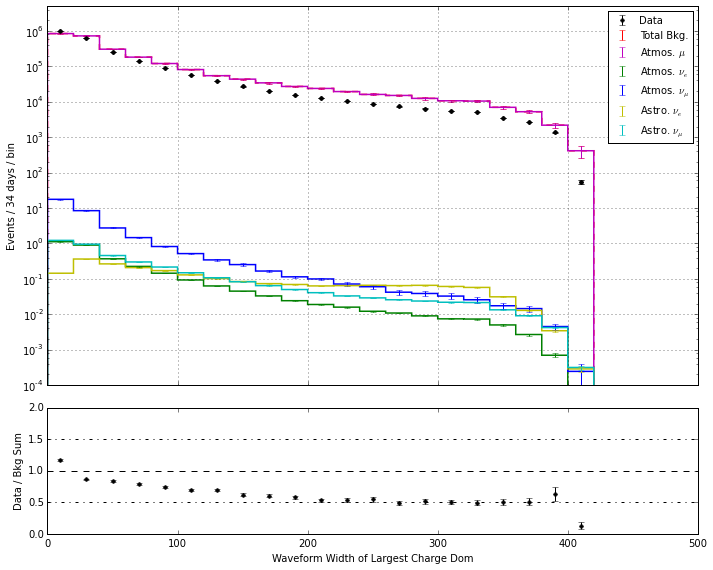

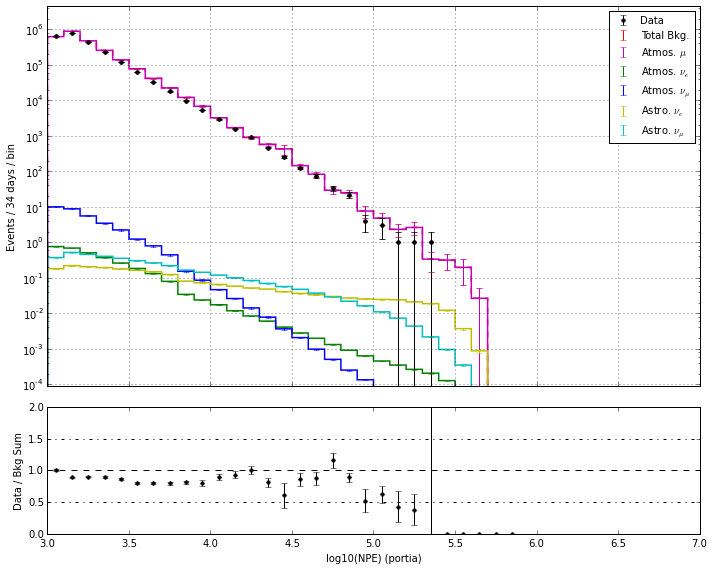

In [10]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            lims[4],
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    plt.savefig(savedir+'baseline/'+lims[3]+'.png')

In [11]:
# Apply qlayerCut
dt_data = qlayerCut(dt_data, False, 0.8)
dt_numu = qlayerCut(dt_numu, False, 0.8)
dt_nue  = qlayerCut(dt_nue, False, 0.8)
dt_cor  = qlayerCut(dt_cor, False, 0.8)
dt_mc   = qlayerCut(dt_mc, False, 0.8)

info = getinfo(dt_data, dt_mc, dt_cor, dt_nue, dt_numu)


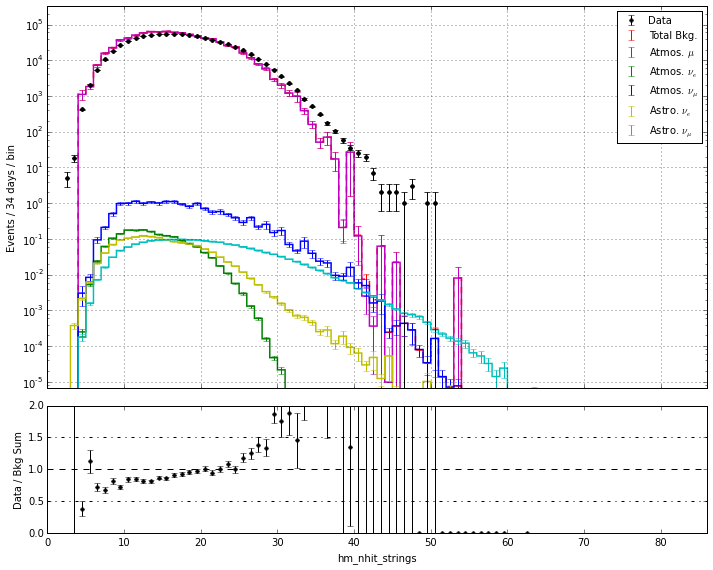

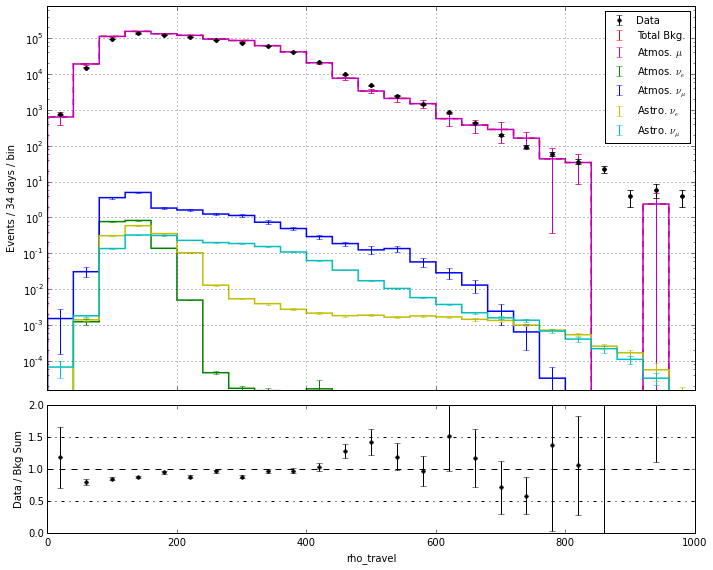

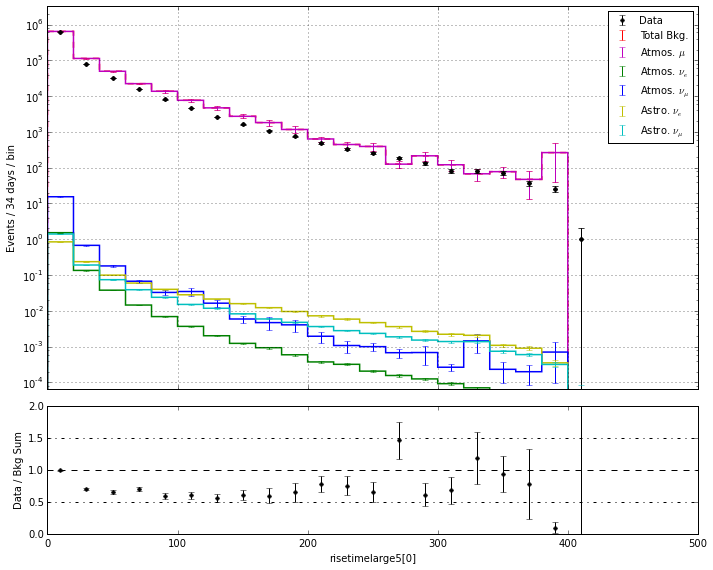

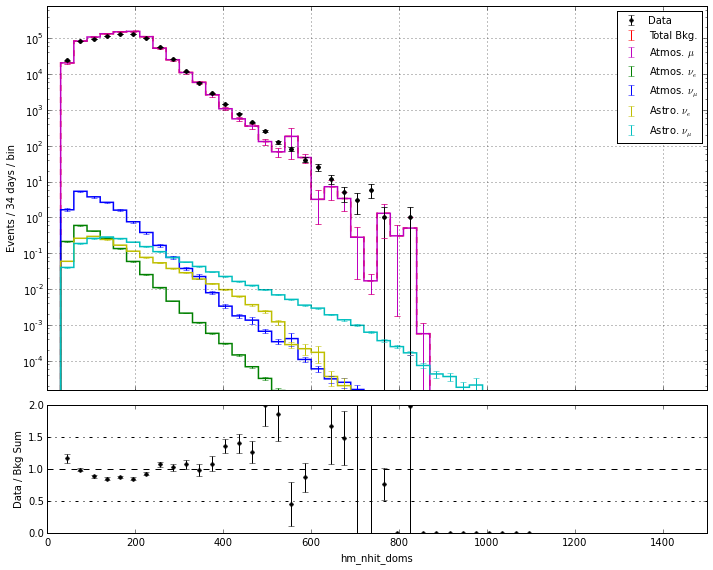

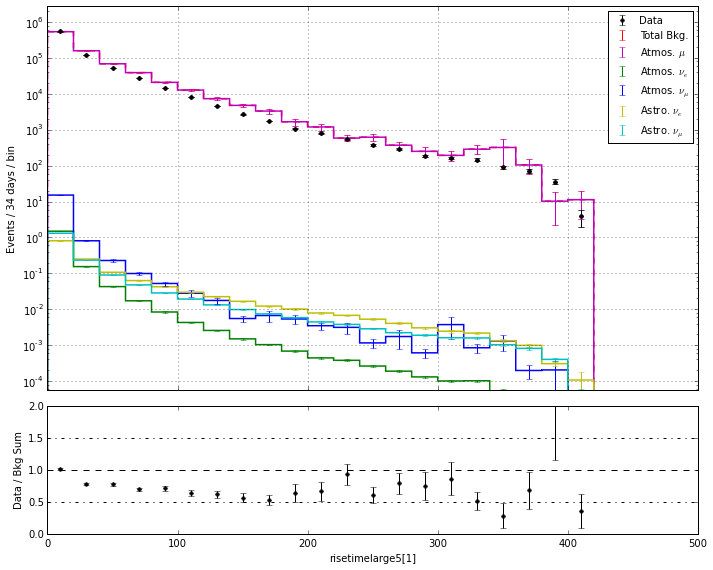

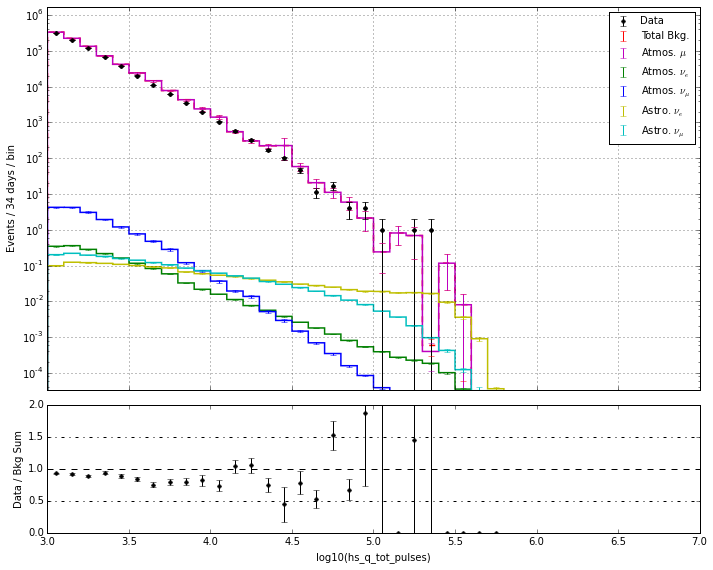

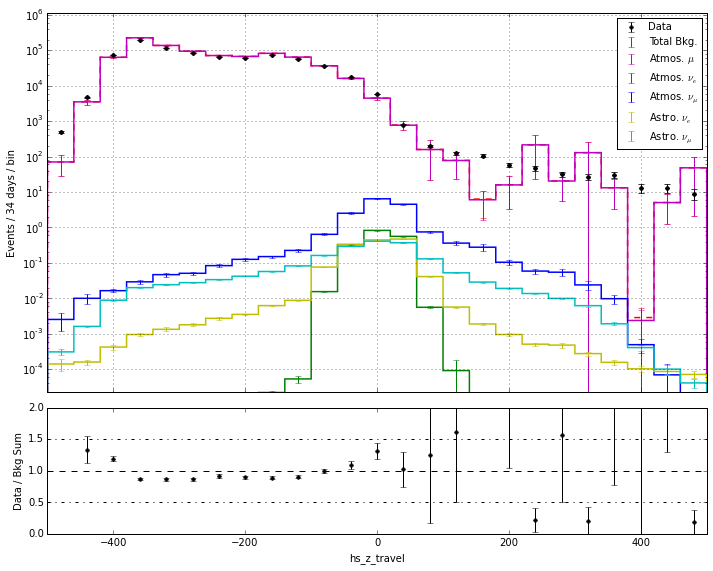

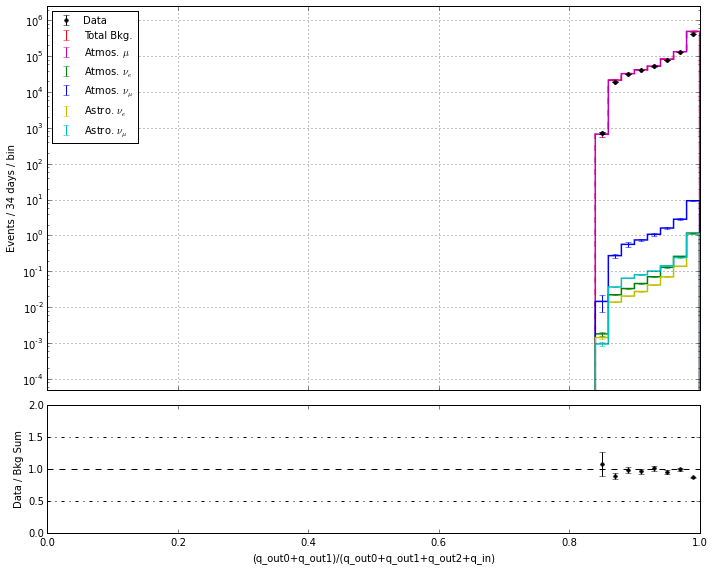

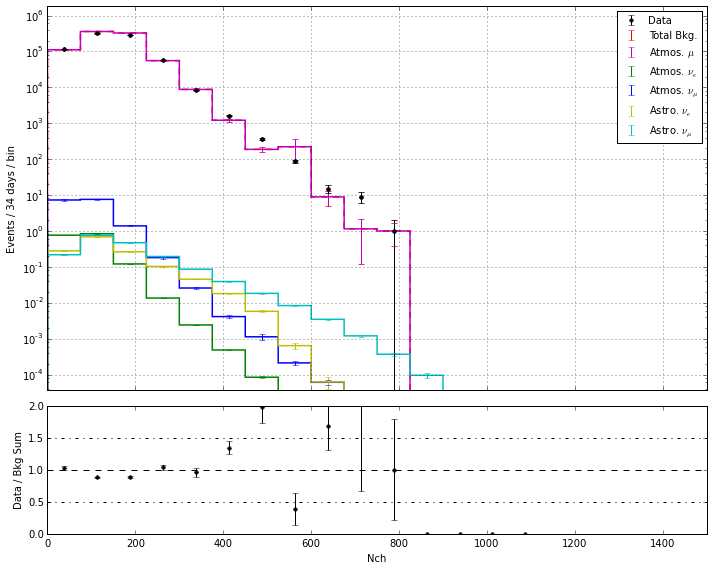

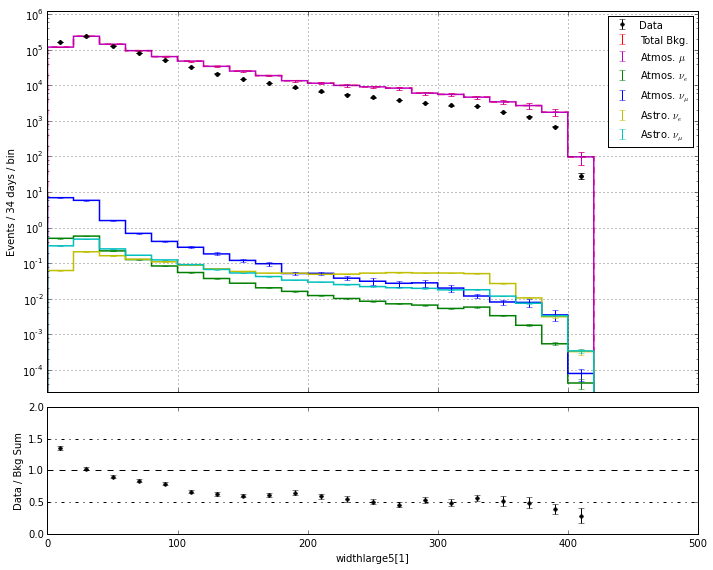

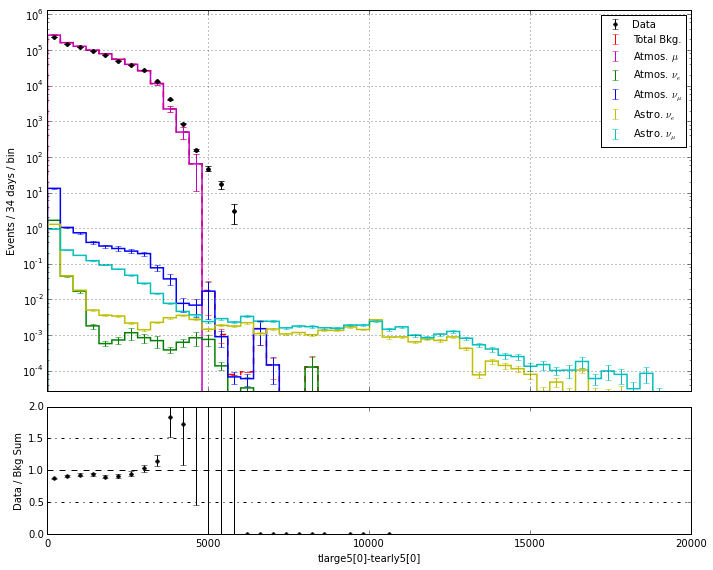

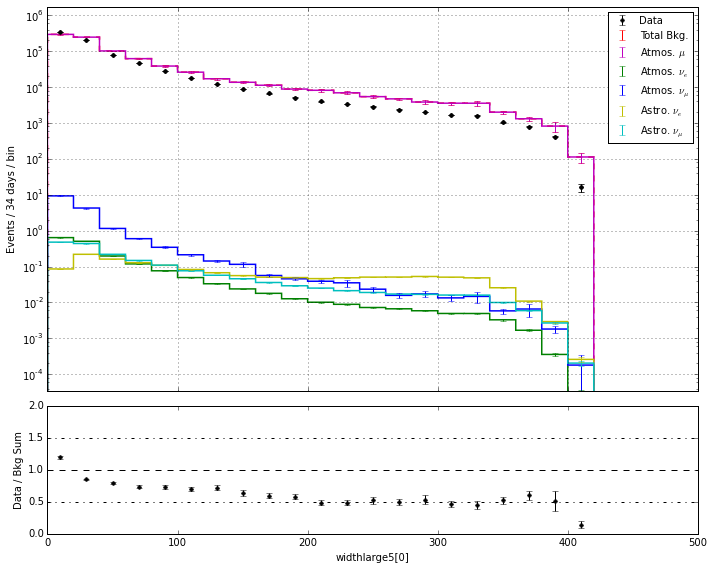

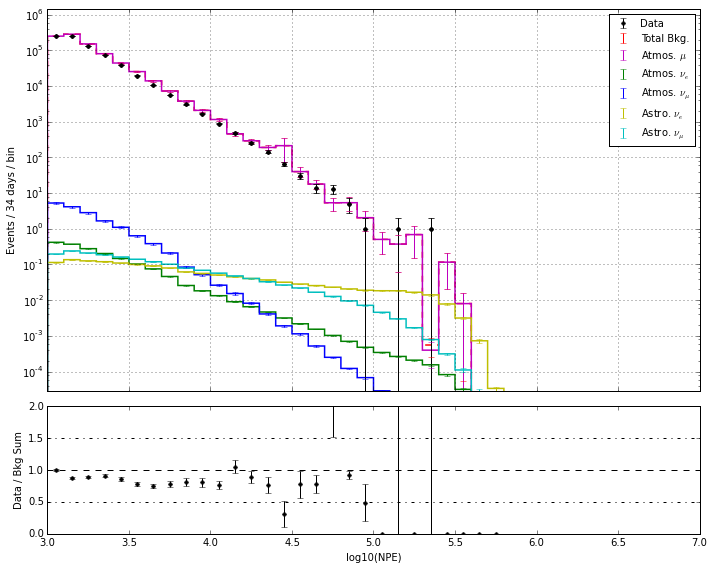

In [12]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            var,
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)
    
    plt.savefig(savedir+'qratio/'+lims[3]+'.png')

In [13]:
# Make sure the first hit is on the outer string
strings = [1,2,3,4,5,6,
           13,21,30,40,50,
           59,67,74,
           73,72,
           78,77,76,75,
           68,60,51,41,31,
           22,14,7]
def firsthitouter(data):
    return data[ data['StrNearly5[0]'].apply(lambda x: x in strings) ]



for i in range(len(info['data'])):
    info['data'][i] = firsthitouter( info['data'][i] )


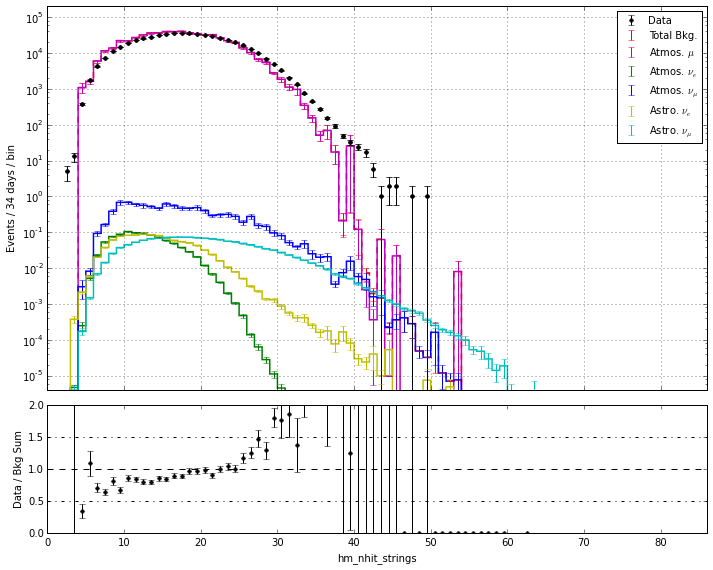

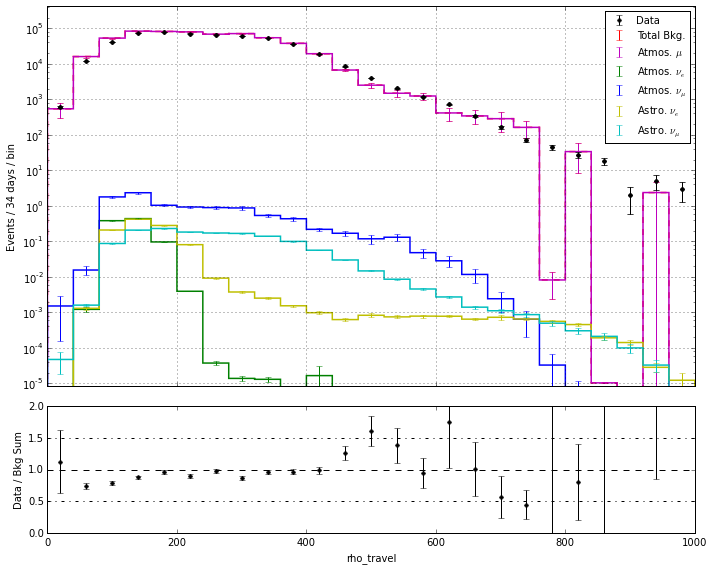

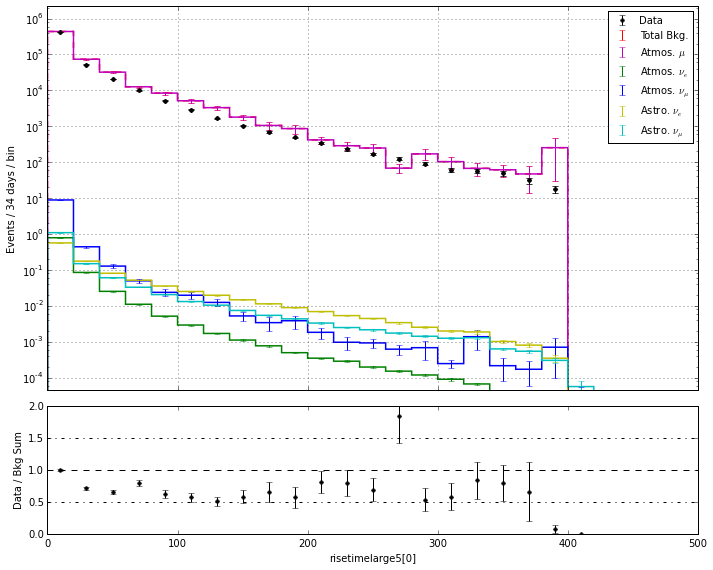

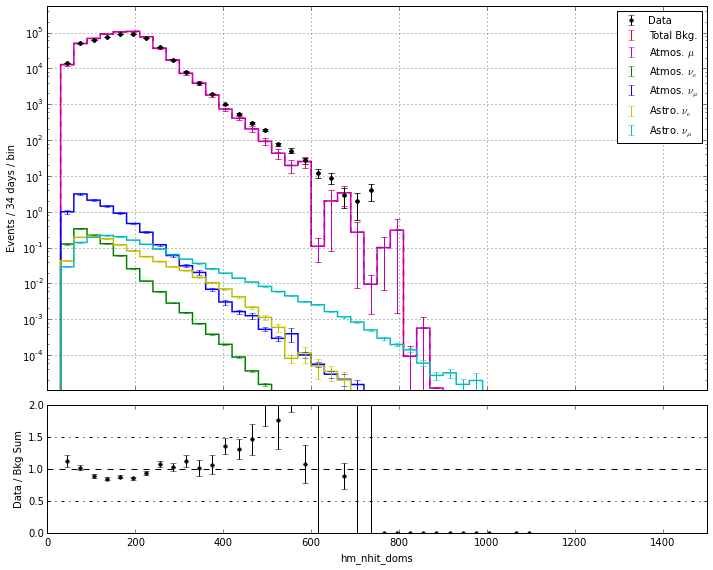

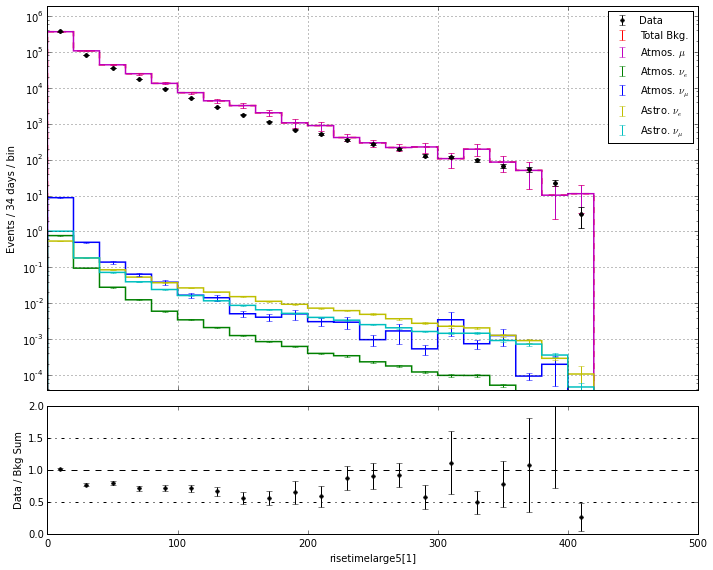

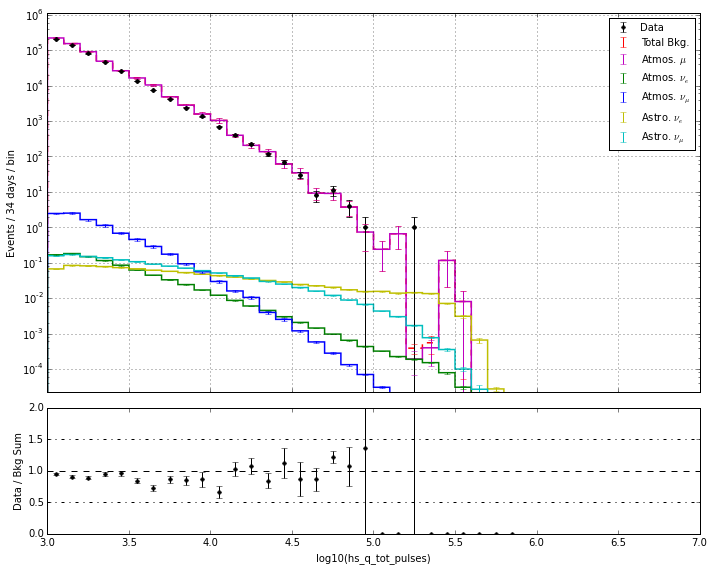

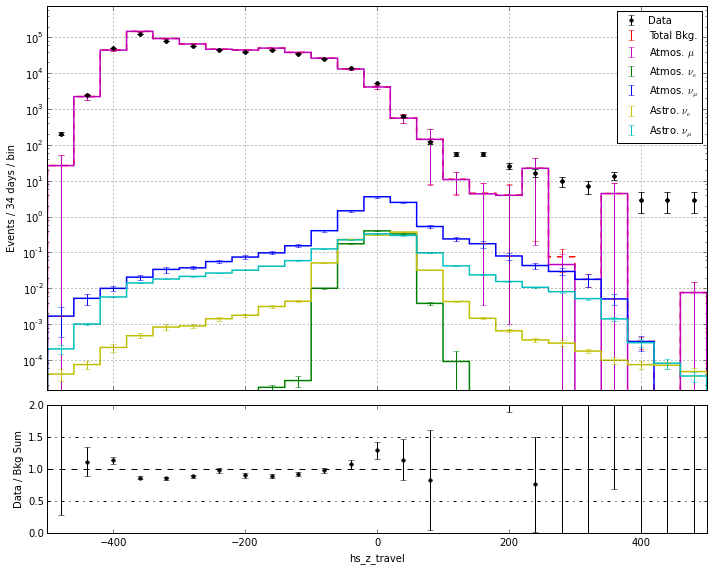

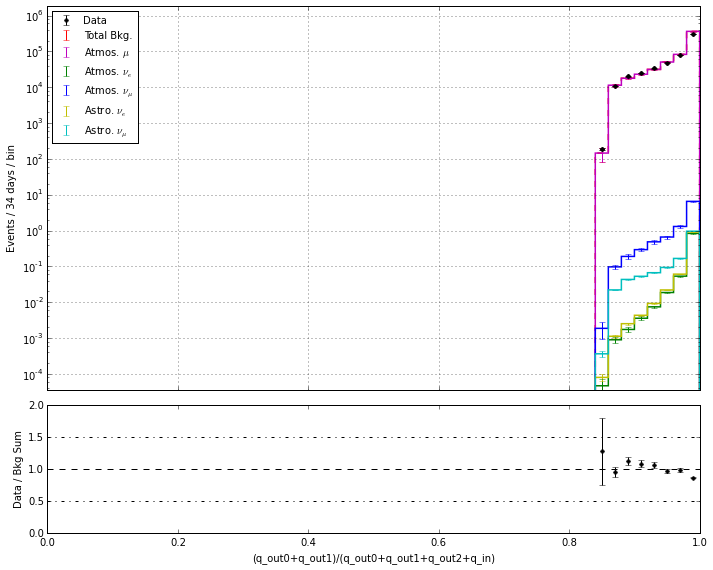

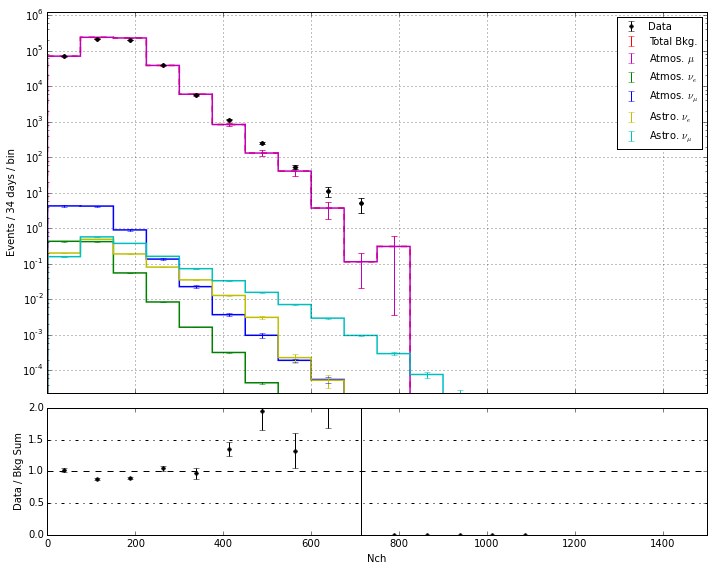

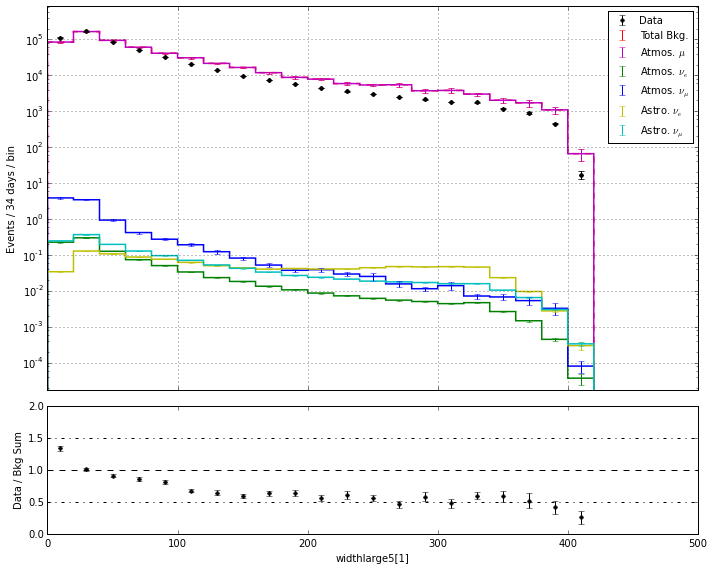

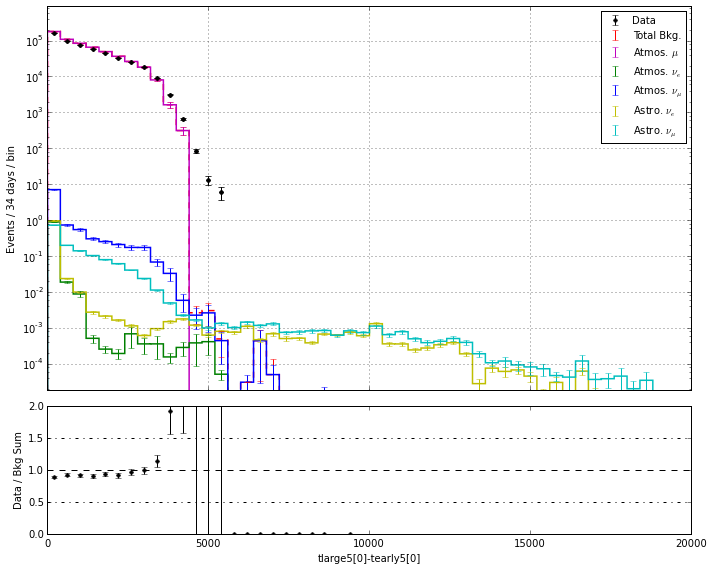

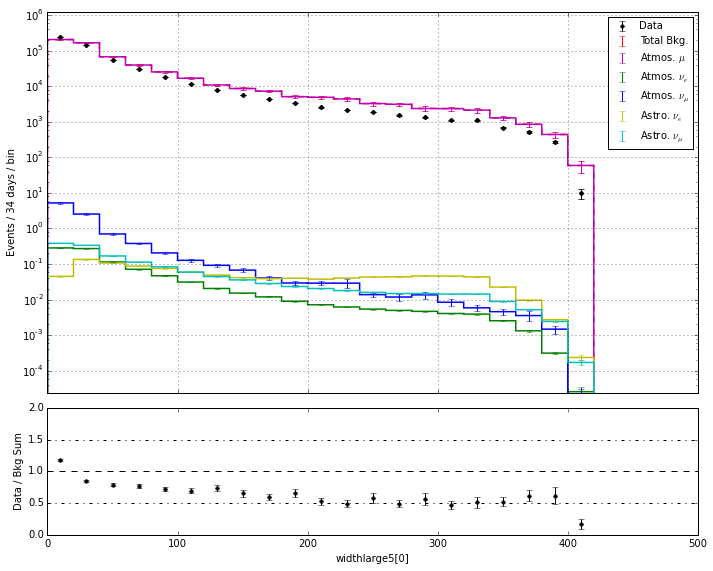

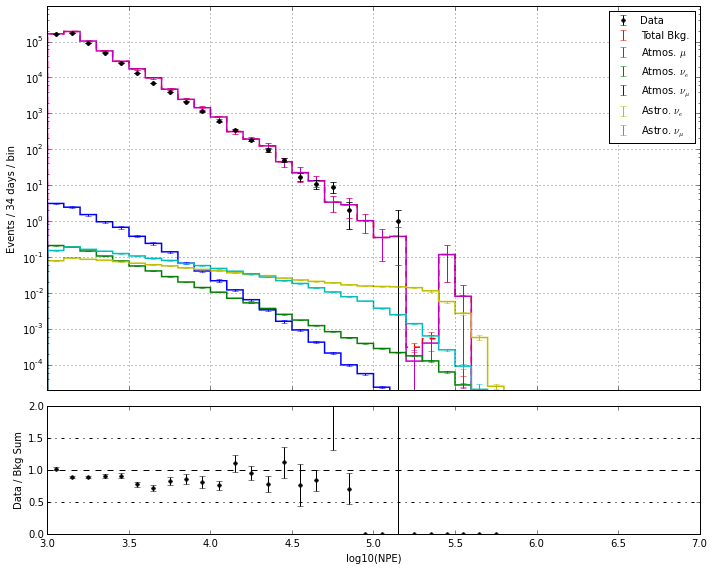

In [14]:
for var in variables:
    
    lims = variables[var]
    
    p_tool.plotStackedRatio(info, 
                            var, 
                            var,
                            lims[0], lims[1], lims[2], 
                            1e-10,
                            True, False)